# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb, neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

# All imports

The basic libraries, you may import more if there are present on the server's environment

In [1]:
import numpy as np
import uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import Neutrino_functions

from math import *
import scipy as sci

# Opening the MC and data frames

In [2]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# You can display the dataframe by uncommenting these lines and running the cell

In [3]:
# Uncomment these lines to display the dataframes
pd.set_option('display.max_columns', 100)
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,Subevent
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,1
3,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0
10,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0
11,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,0
13,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0
14,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,1
16,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0
19,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0
37,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0


# This command, when ran, shows you the different inputs you can give the function

You can access this function. It is present in Neutrino_functions.py. You can create your own plotting function if you wish.

In [4]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Make your selections here

Modify selection cuts. Remember to cut the same variables in both data sets.

In [5]:
def Selections(frame):
    
    # Basic variables present in dataframe
    trk_start_x_v = frame['trk_sce_start_x_v']
    trk_start_y_v = frame['trk_sce_start_y_v']
    trk_start_z_v = frame['trk_sce_start_z_v']
    trk_end_x_v = frame['trk_sce_end_x_v']
    trk_end_y_v = frame['trk_sce_end_y_v']
    trk_end_z_v = frame['trk_sce_end_z_v'] 
    reco_x = frame['reco_nu_vtx_sce_x']
    reco_y = frame['reco_nu_vtx_sce_y']
    reco_z = frame['reco_nu_vtx_sce_z']
    topological = frame['topological_score']
    trk_score_v = frame['trk_score_v']
    trk_dis_v = frame['trk_distance_v']
    trk_len_v = frame['trk_len_v']
    trk_energy_tot = frame['trk_energy_tot']
    
    # adding in nucosmic distance
    cosmic_distance = frame['_closestNuCosmicDist']
    
    cat = frame['category']
    
    # List of [signal entries , purity , label]. Can be appended each selection cut
    #event = []
    #event.append([len(frame[cat==21]['category']),len(frame[cat==21]['category'])/len(frame['category']),'basic'])
    
    
    # select the conditions you want to apply 
    # The example here removes tracks of lengths that are greater than 1000 cm
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    # limit the fiducial volume (only need to apply this once, maybe use hard limits on one of the spatial coordinates)
    #selection = selection & (trk_start_x_v < np.max(trk_start_x_v)*0.99) & (trk_start_x_v > np.max(trk_start_x_v)*0.01)
    #selection = selection & (trk_start_y_v < np.max(trk_start_y_v)*0.99) & (trk_start_y_v > np.max(trk_start_y_v)*0.01)
    #selection = selection & (trk_start_z_v < np.max(trk_start_z_v)*0.99) & (trk_start_z_v > np.max(trk_start_z_v)*0.01)
    
    # one more cut as the above one is imperfect
    selection = selection & (trk_end_x_v < 250) & (trk_end_x_v > 10)
    
    # remove the massive energy spike thats unphysical
    selection = selection & (trk_energy_tot < 4)
    
    # remove the 0 component from nu cosmic distance
    selection = selection & (cosmic_distance > 10)
    
    # separate frame from frame_selection to allow for efficiency calculations
    frame_selection = frame[selection]
    
    # quick check to see if the table has any truth data (as this code is run on the real data as well as MC data) 
    # bit of a janky solution currently but it'll do
    
    if (len(frame[cat==21]['category']) != 0):
        # before applying, calculate efficiency and purity in here (its easier!)
        efficiency = len(frame_selection[cat==21]['category'])/len(frame[cat==21]['category'])
        purity = len(frame_selection[cat==21]['category'])/len(frame_selection)
        print("WARNING: Cutting efficiency will only be accurate across first application, after that point it will be set to 1.00.\nCutting Efficiency: {:.2f}\nCutting Purity: {:.2f}".format(efficiency, purity))

    # Apply selection on dataframe
    frame = frame_selection
    
    return frame

# Calls the selection function on the dataframes

In [6]:
MC_EXT = Selections(MC_EXT)
data_frame = Selections(data)
# be careful here, as you're trimming a trimmed dataset if you adjust the selections after running this file!

/tmp/ipykernel_275400/2489794039.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  efficiency = len(frame_selection[cat==21]['category'])/len(frame[cat==21]['category'])
/tmp/ipykernel_275400/2489794039.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  purity = len(frame_selection[cat==21]['category'])/len(frame_selection)


Cutting Efficiency: 0.42
Cutting Purity: 0.76


# Plot all variables and decide on selection cuts

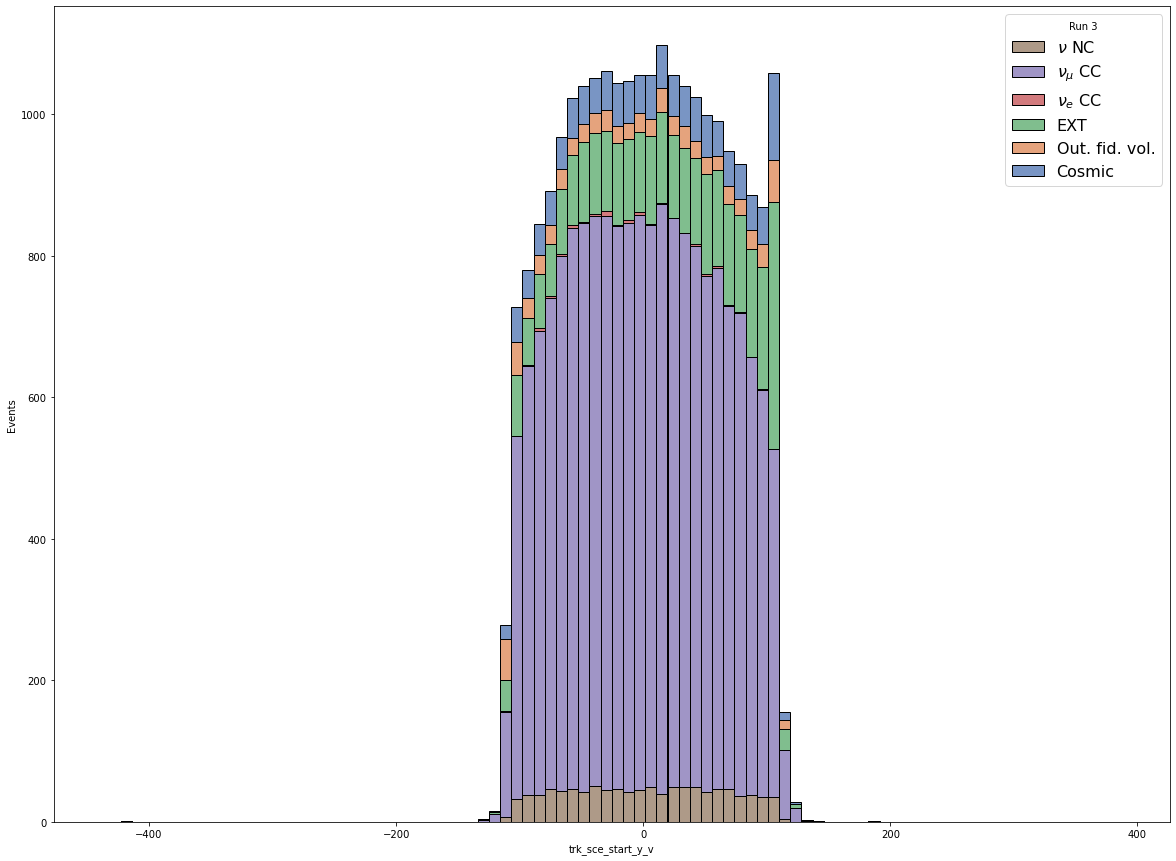

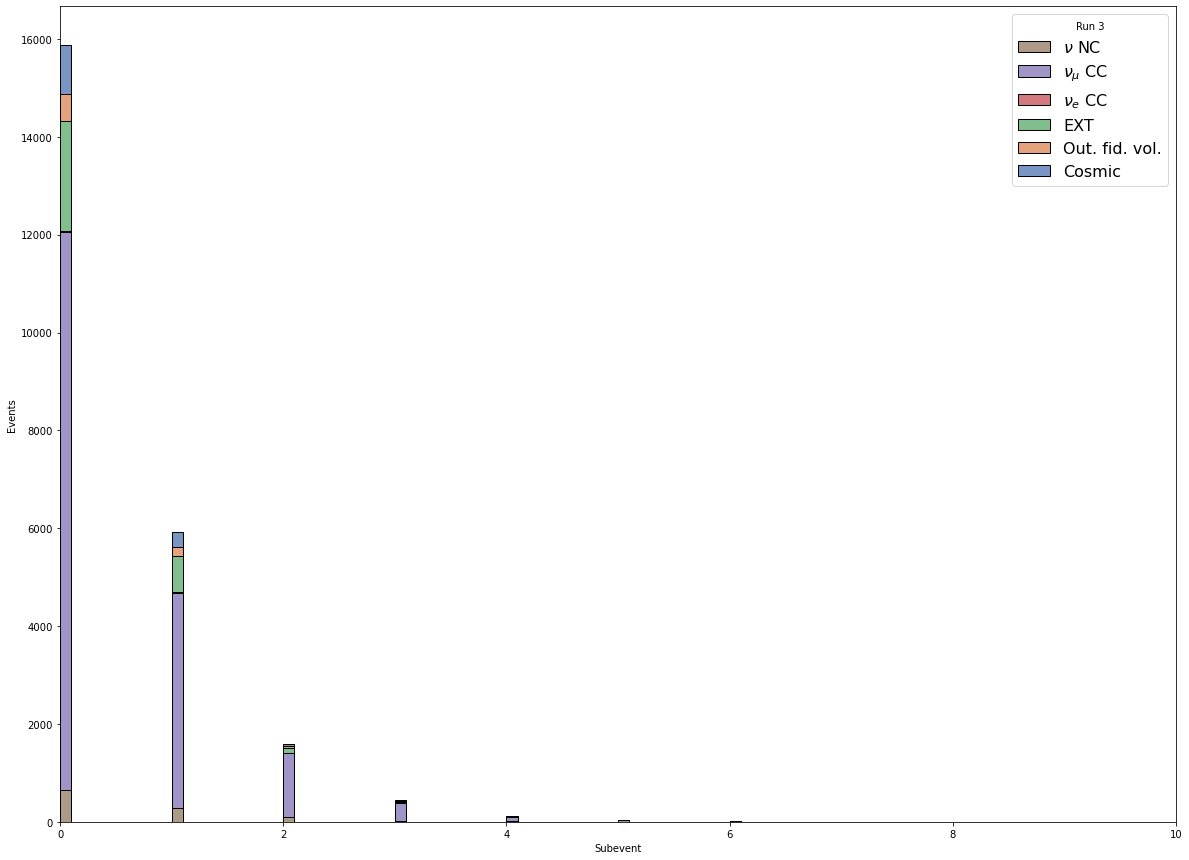

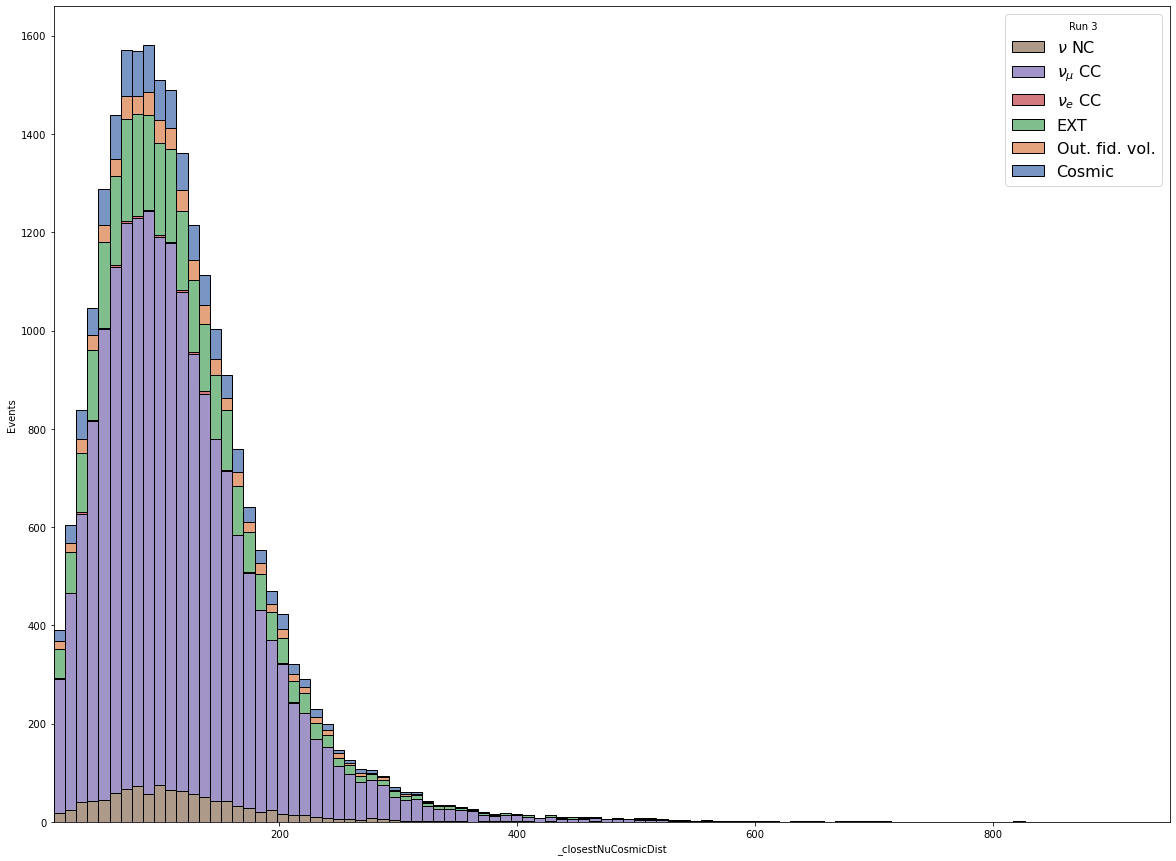

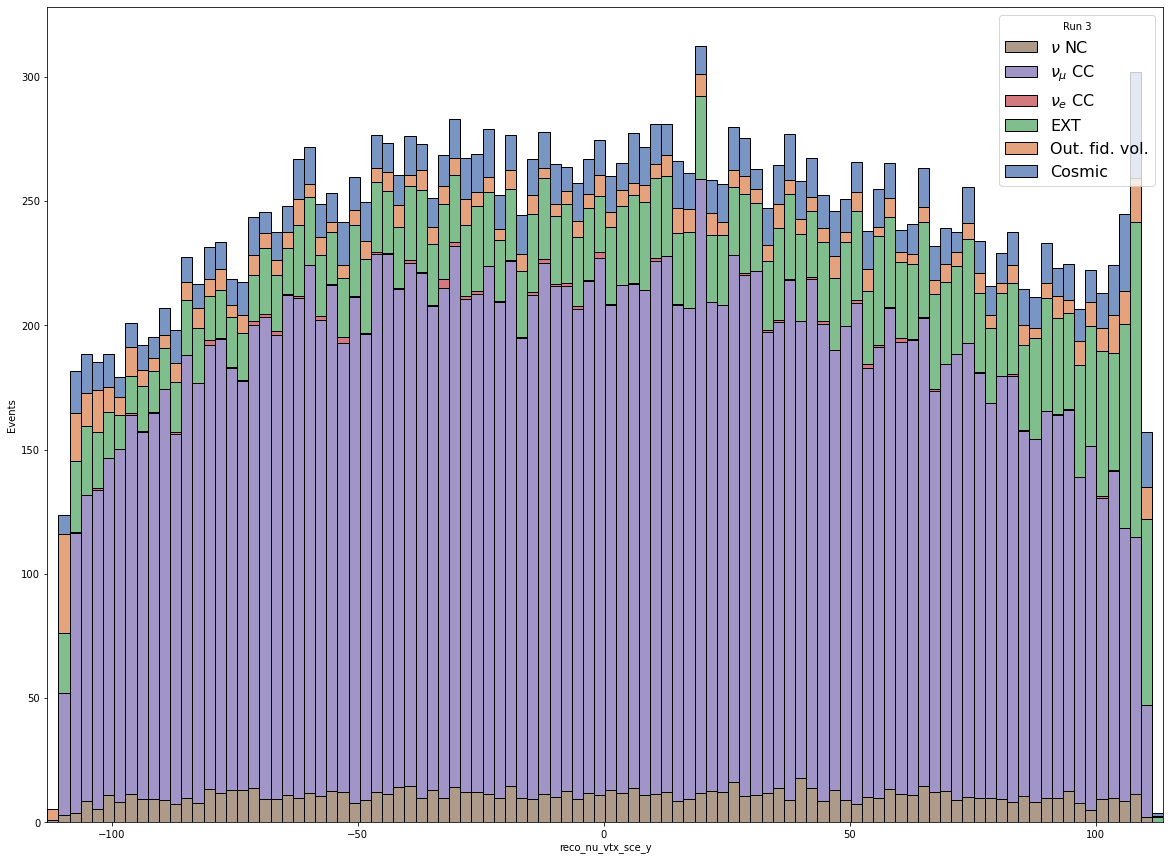

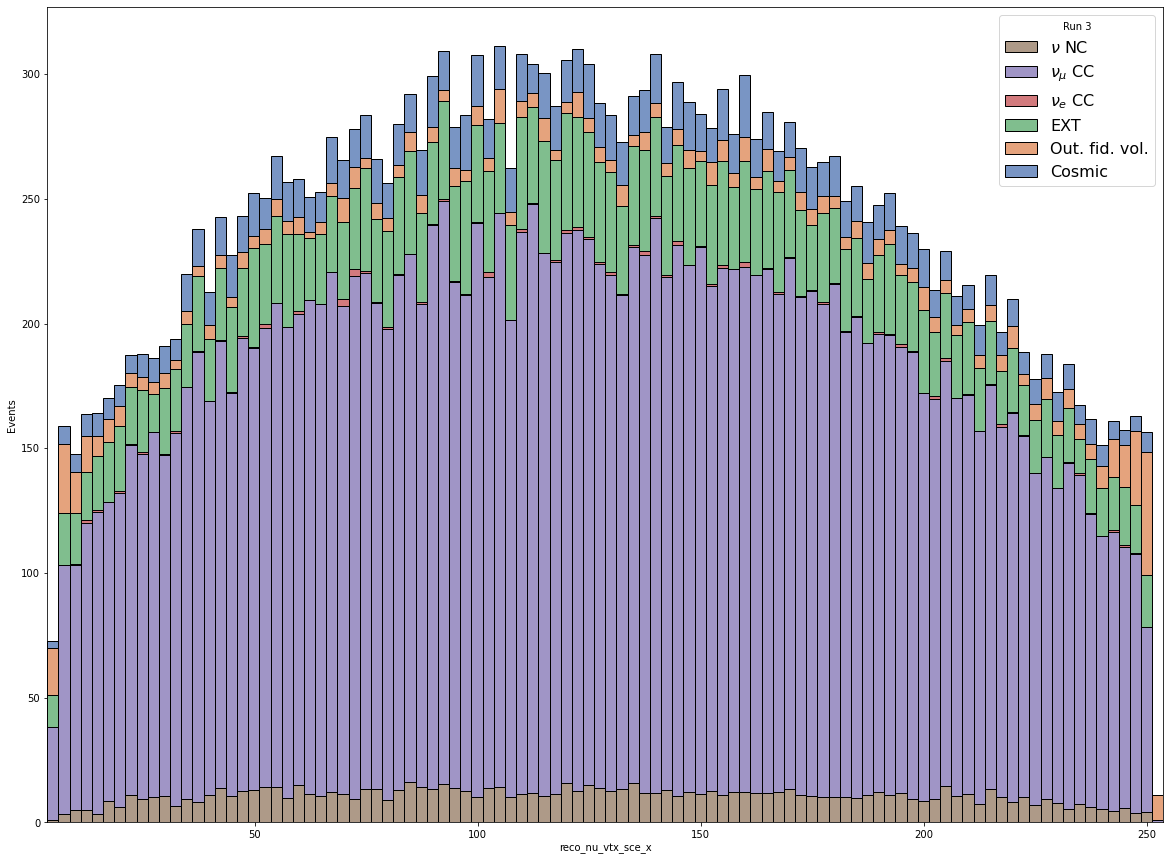

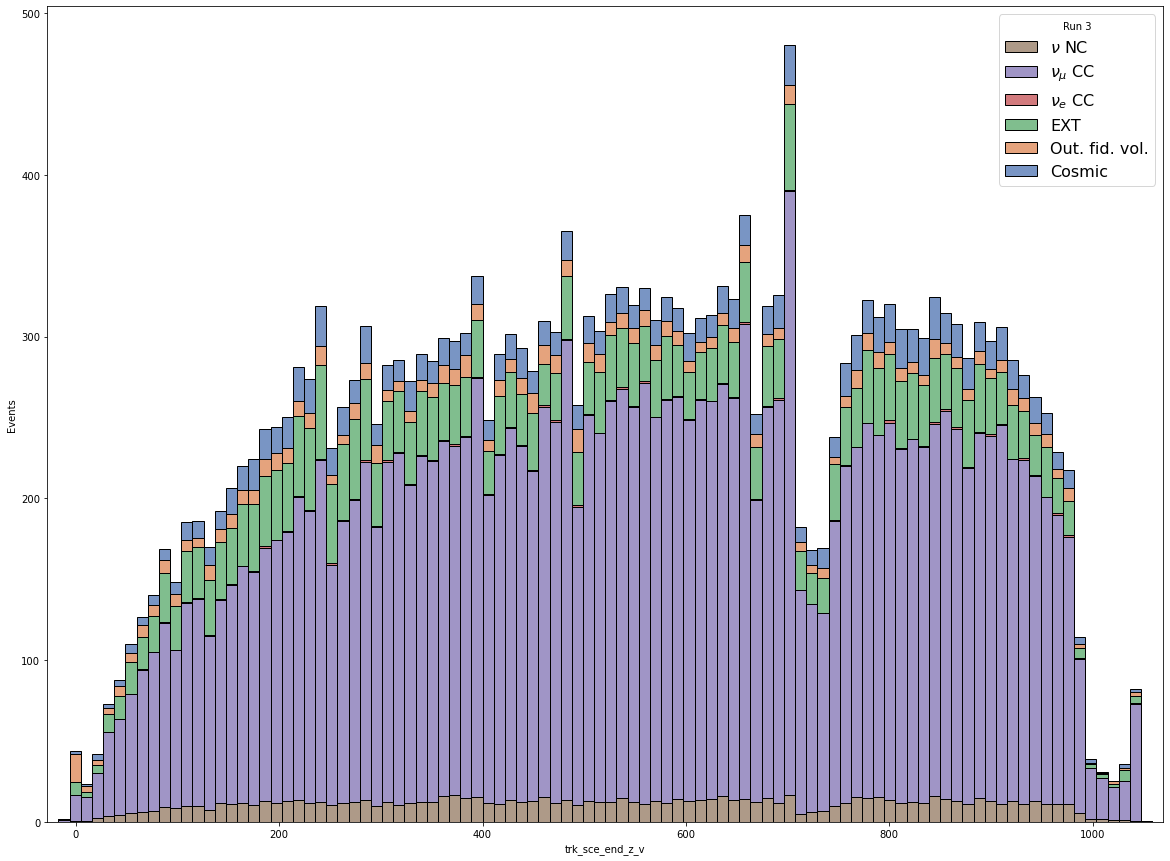

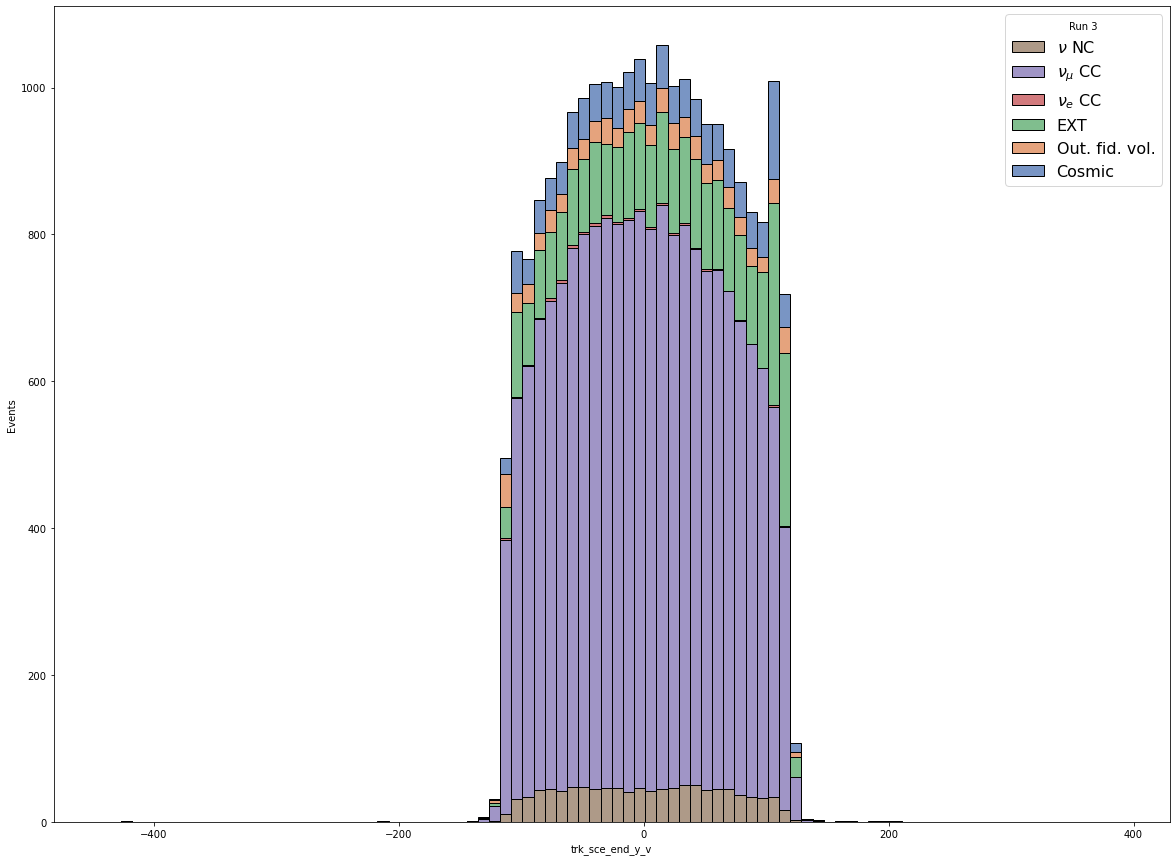

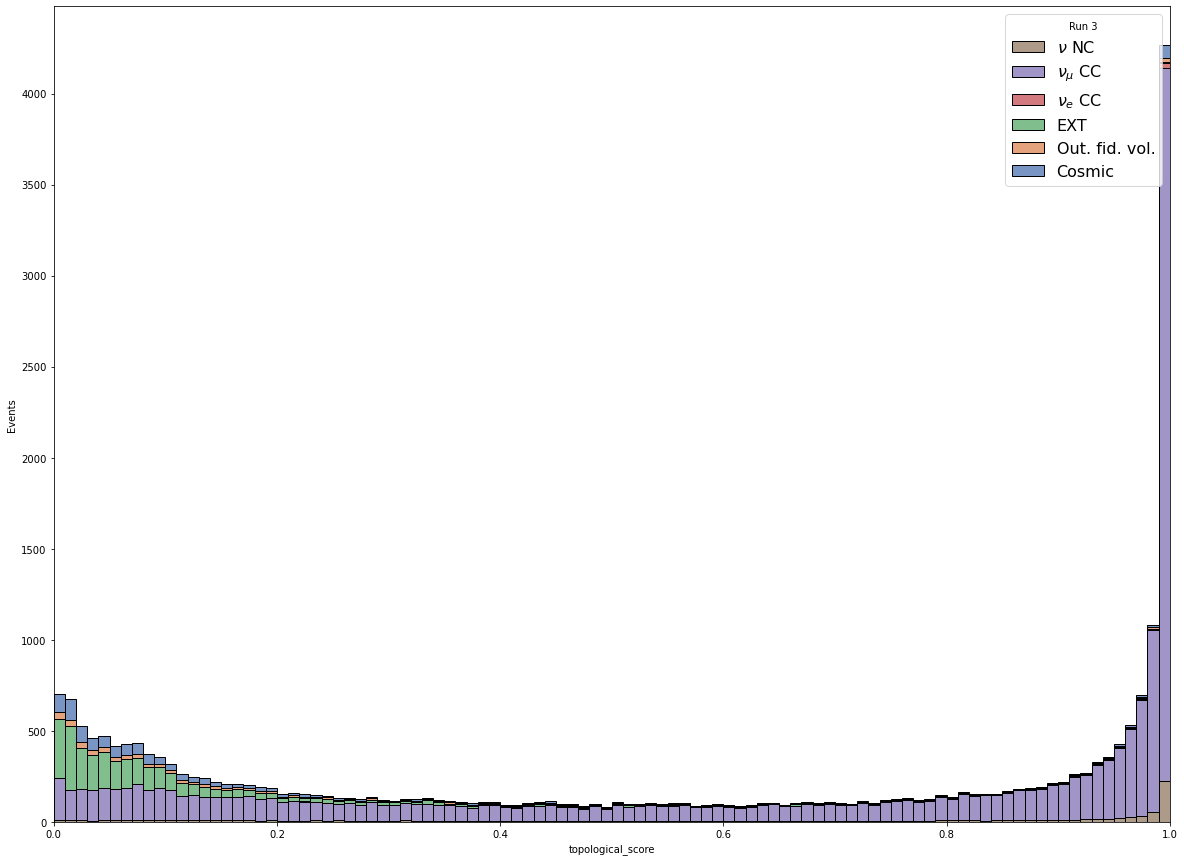

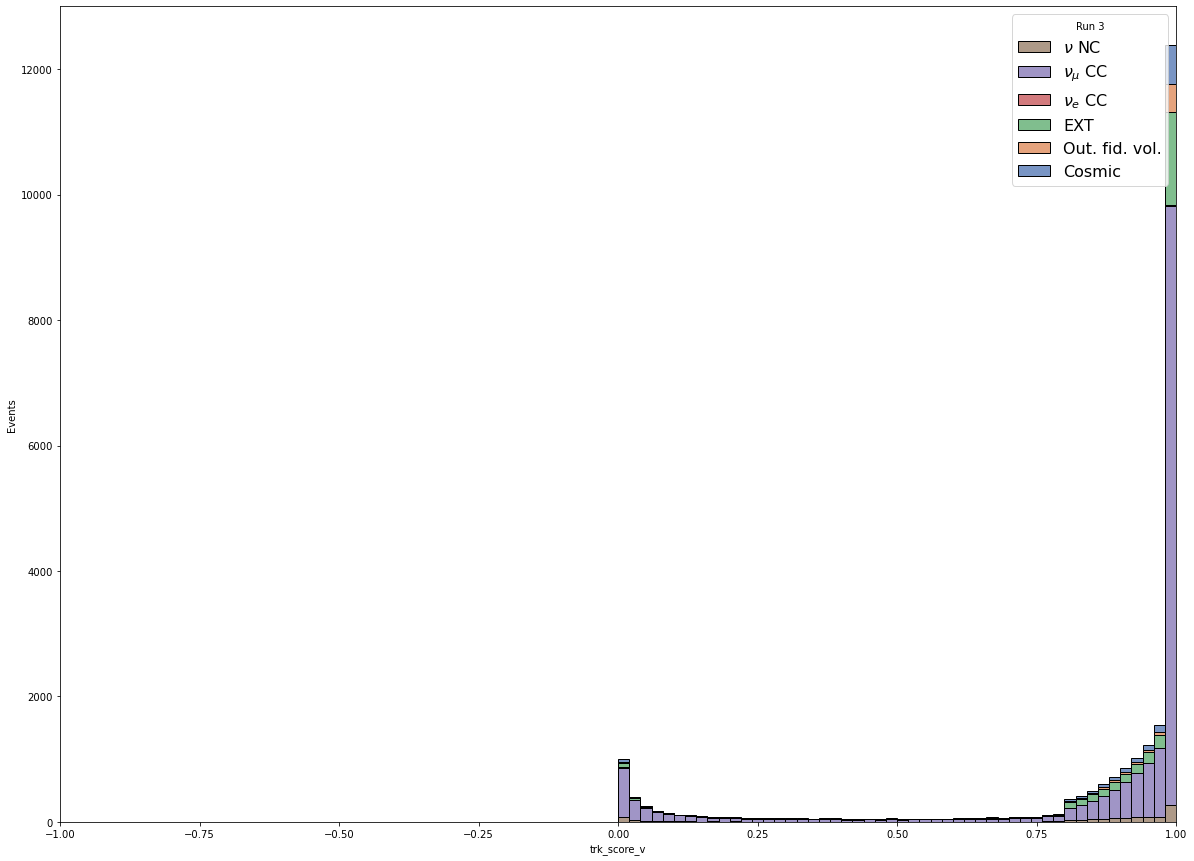

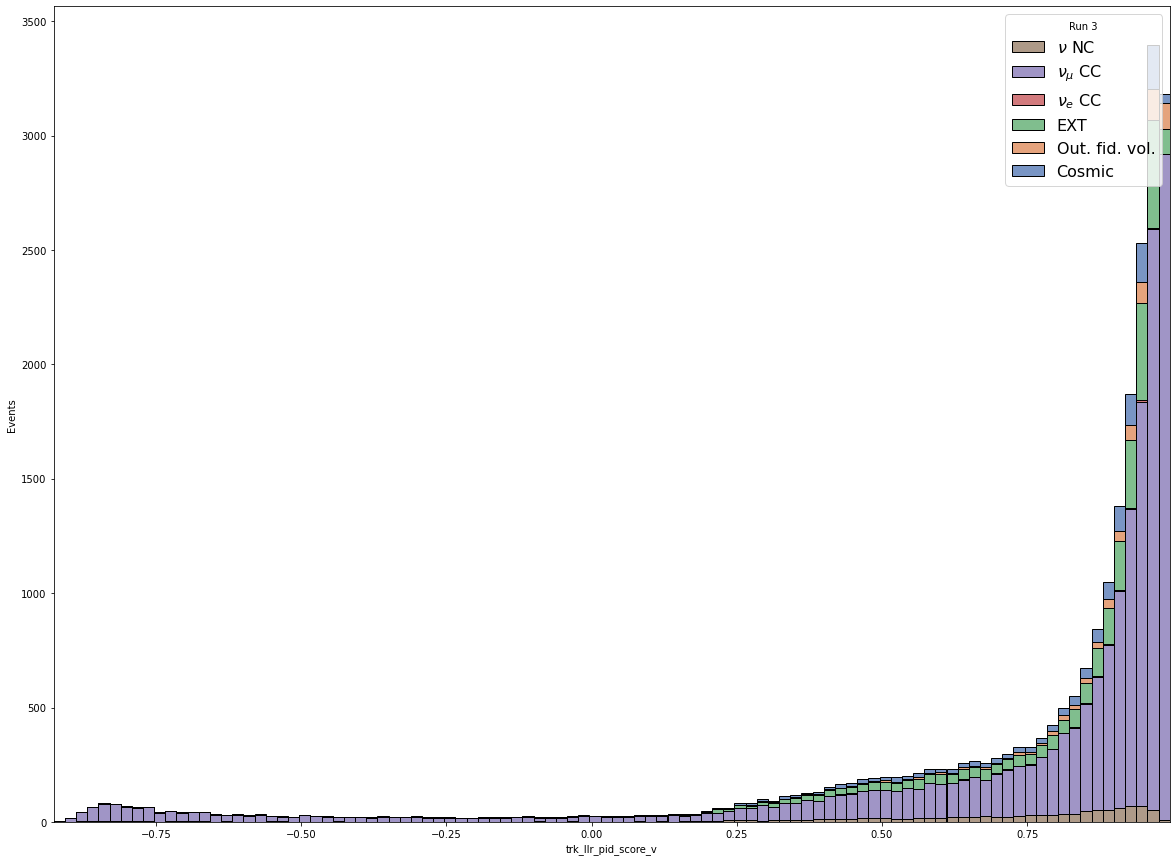

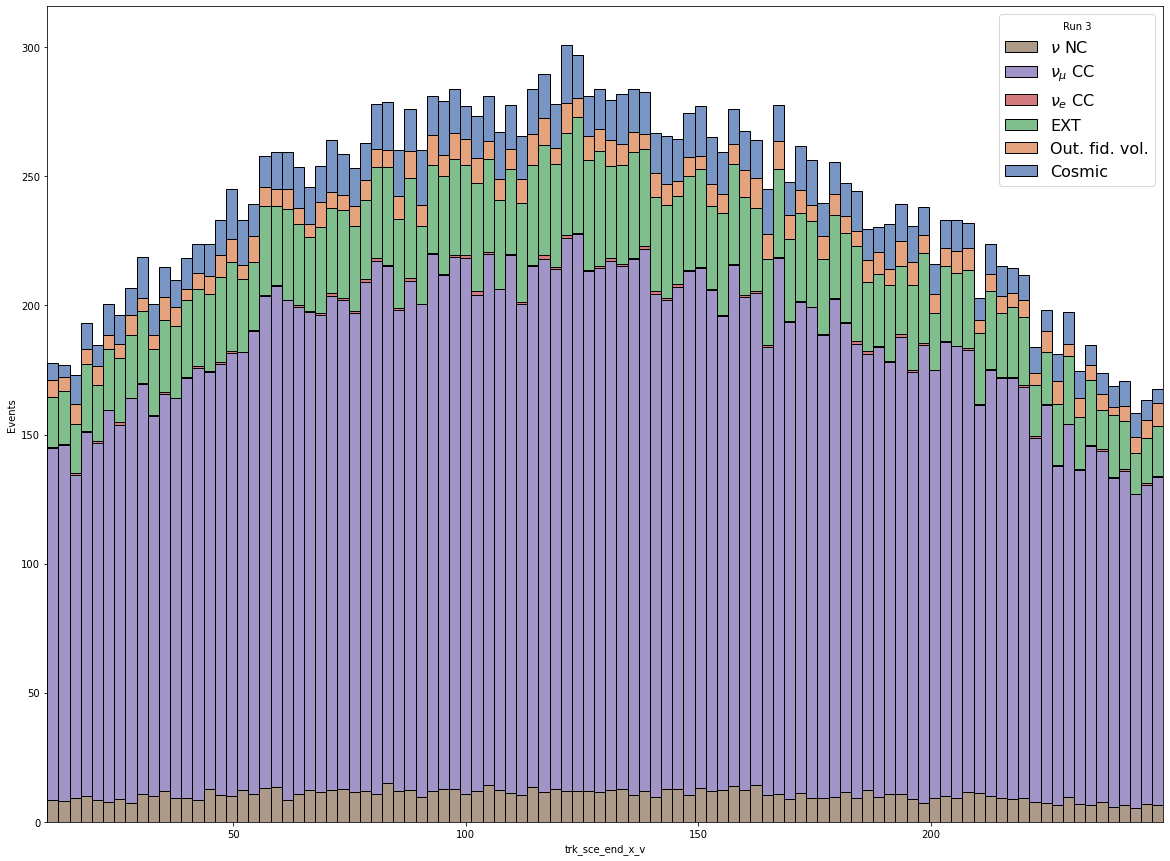

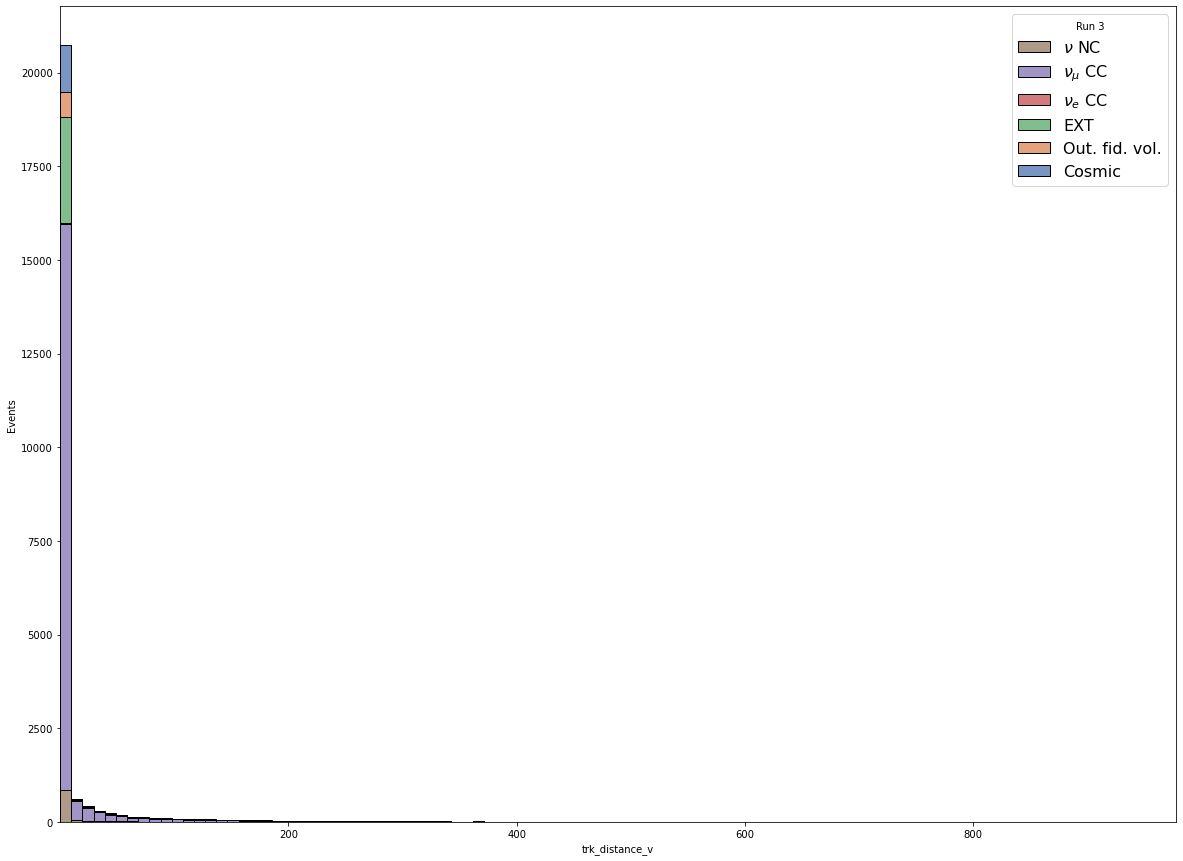

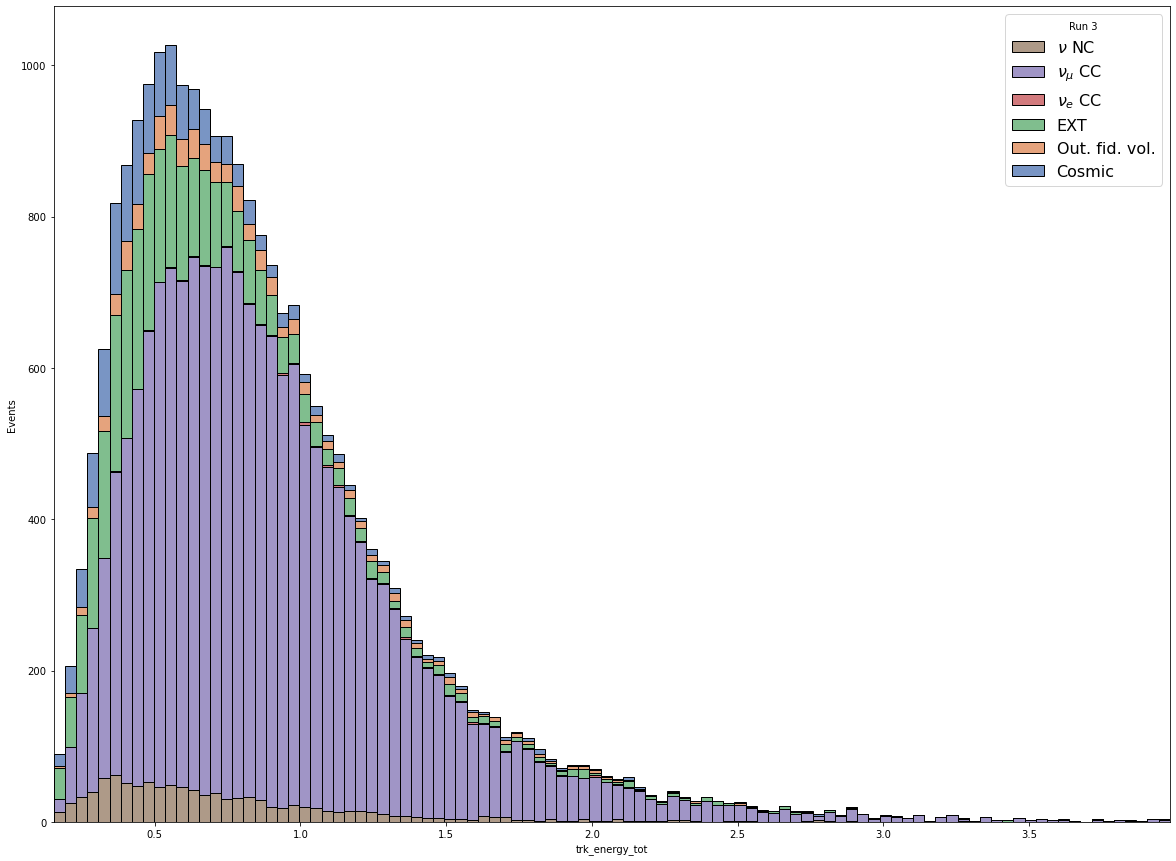

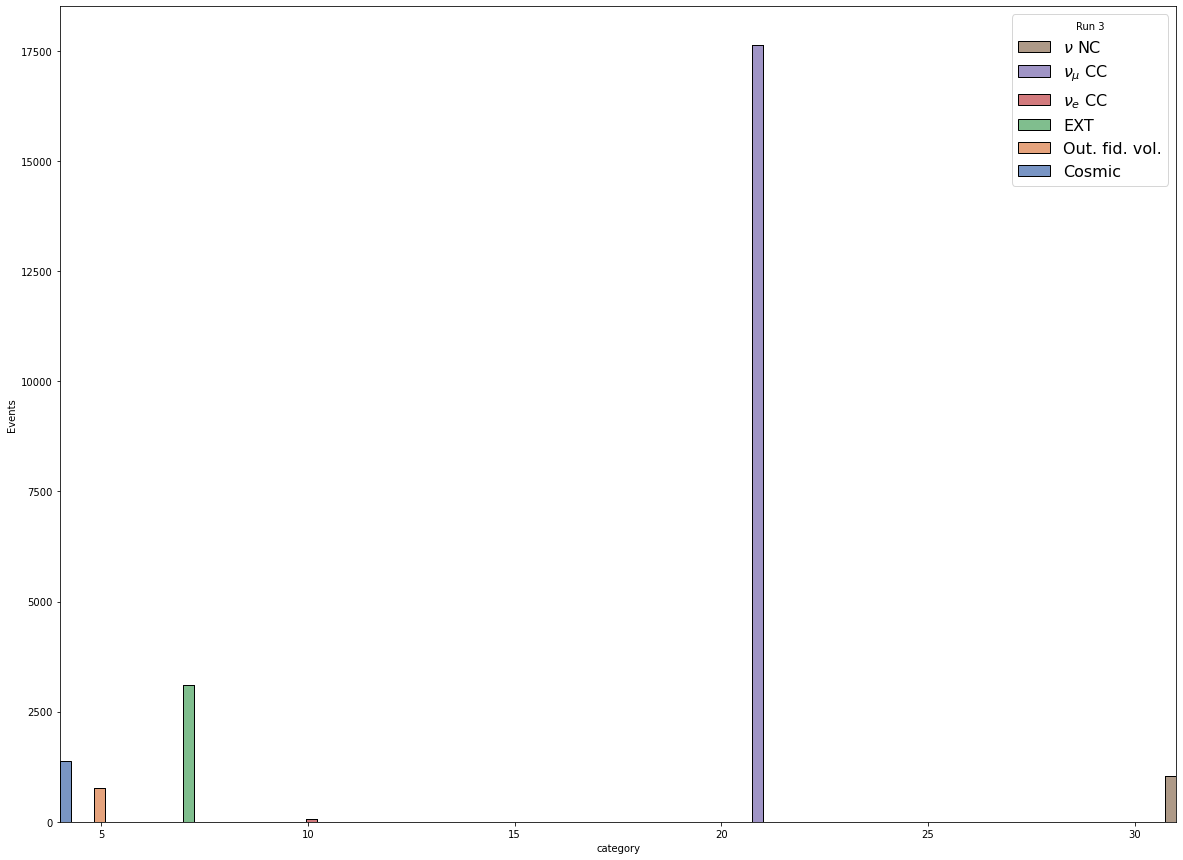

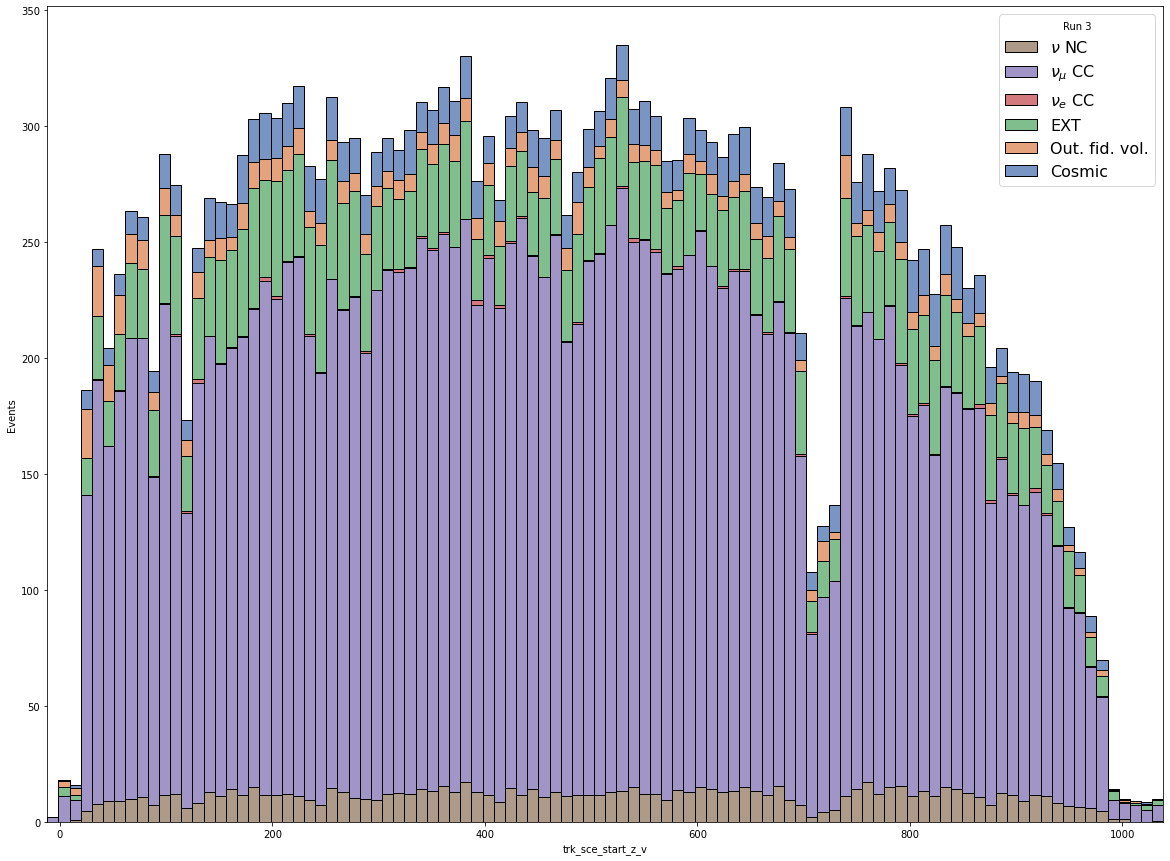

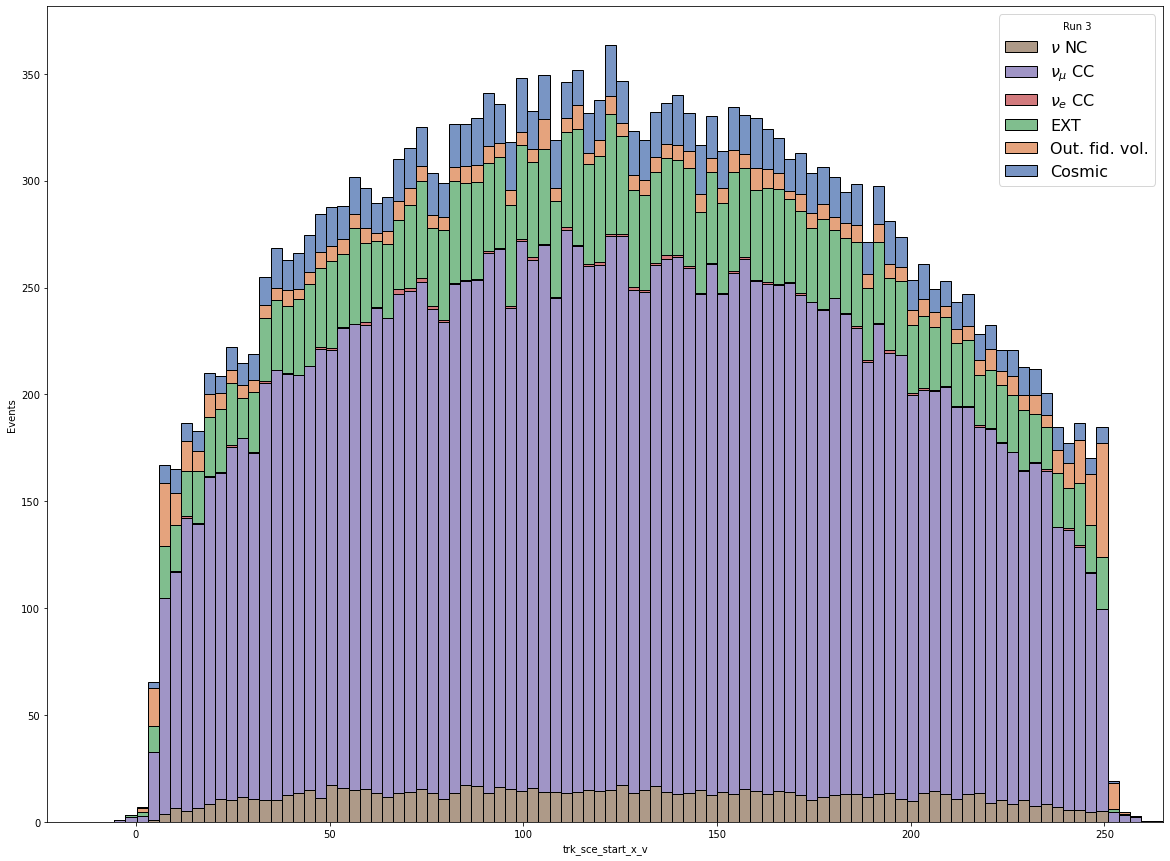

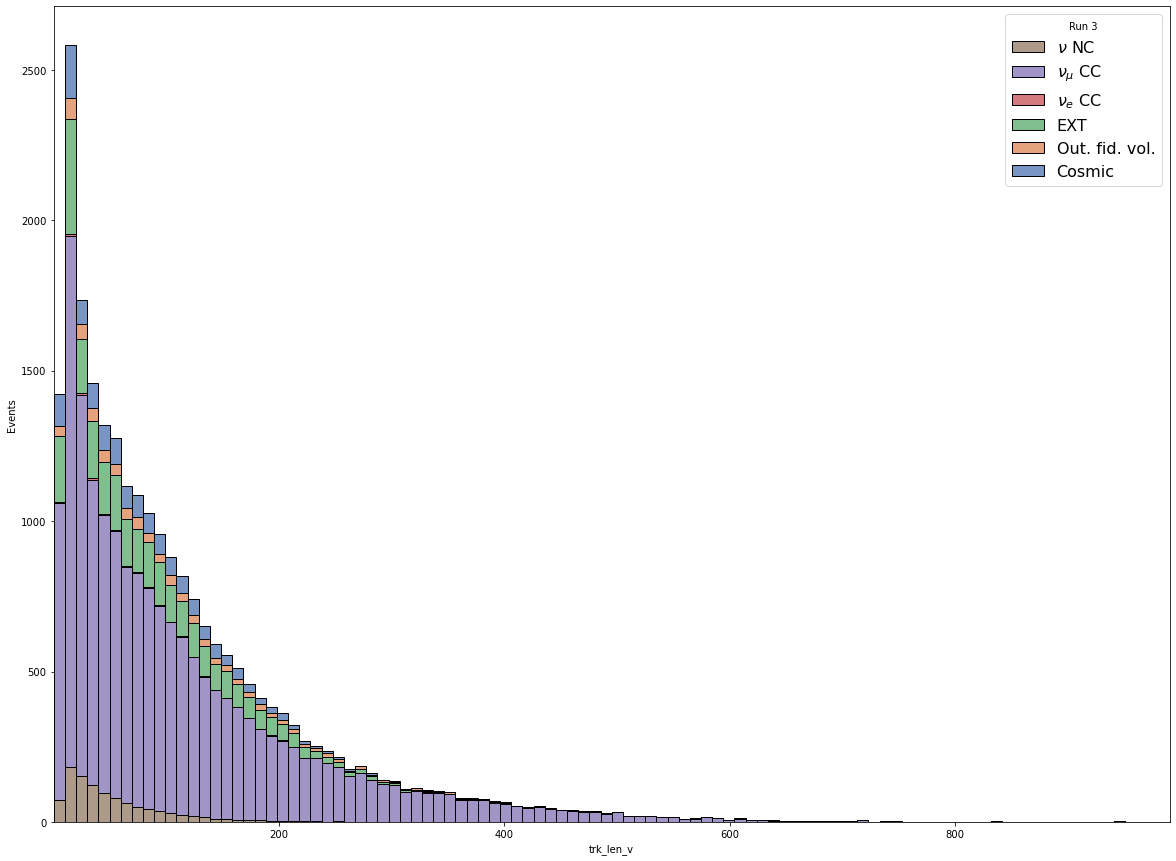

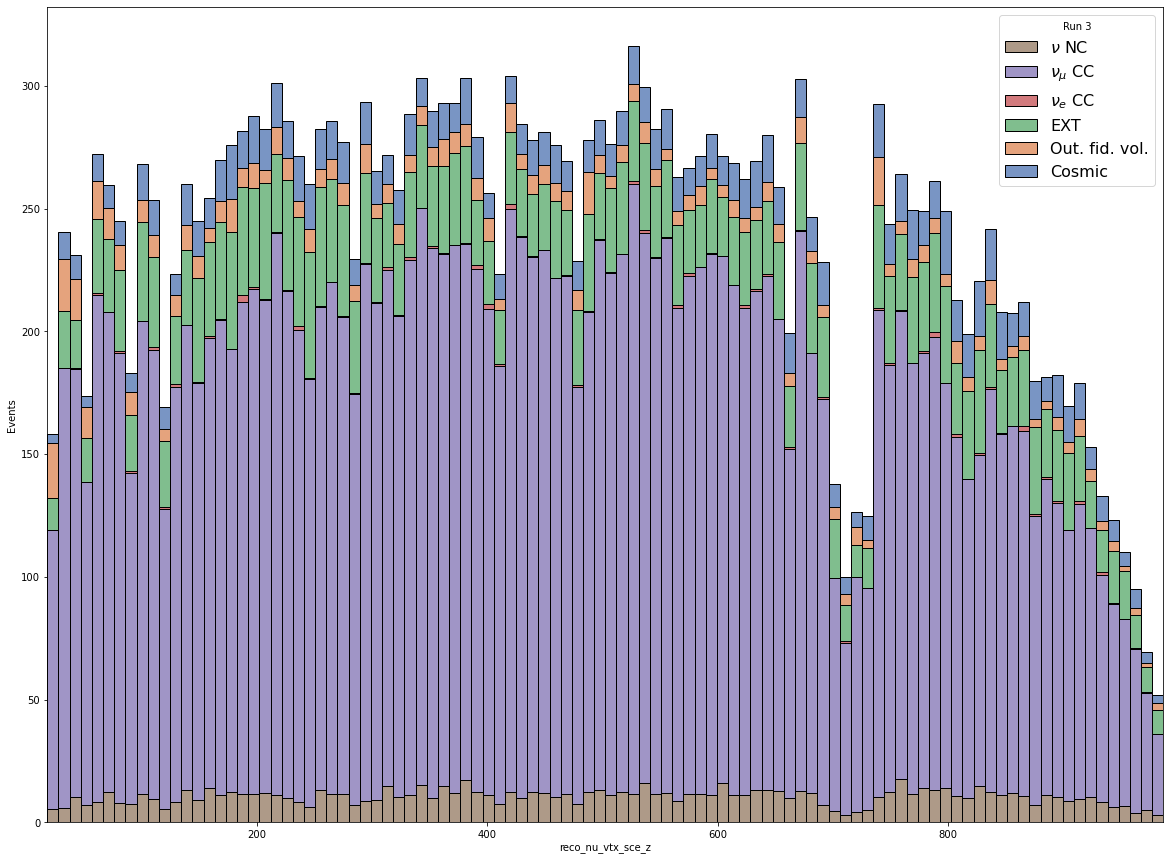

In [7]:
BIN = 100
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT)).intersection(list(data_frame)))

for item in all_variables_to_plot:
    plt.figure(figsize=(20,15))
    i = sns.histplot(data=MC_EXT, x=item, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
    i.set(xlabel=item, ylabel = "Events")

    #plt.yscale('log')
    plt.xlim([np.min(MC_EXT[item]), np.max(MC_EXT[item])])
    plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
    plt.show(i)

# Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

### MOVE THE EFFICIENCY AND PURITY CALCULATIONS OUT OF THE CUTTING FUNCTION!
To do so would require the initial data to always be saved as a comparison. Which isn't a bad idea but is space inefficient (do it regardless).

In [8]:
# List of [signal entries , purity , label]. Can be appended each selection cut
#event = []
#event.append([len(frame[cat==21]['category']),len(frame[cat==21]['category'])/len(frame['category']),'basic'])

# efficiency currently put inside the cutting function. MOVE IT OUT

# Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts 

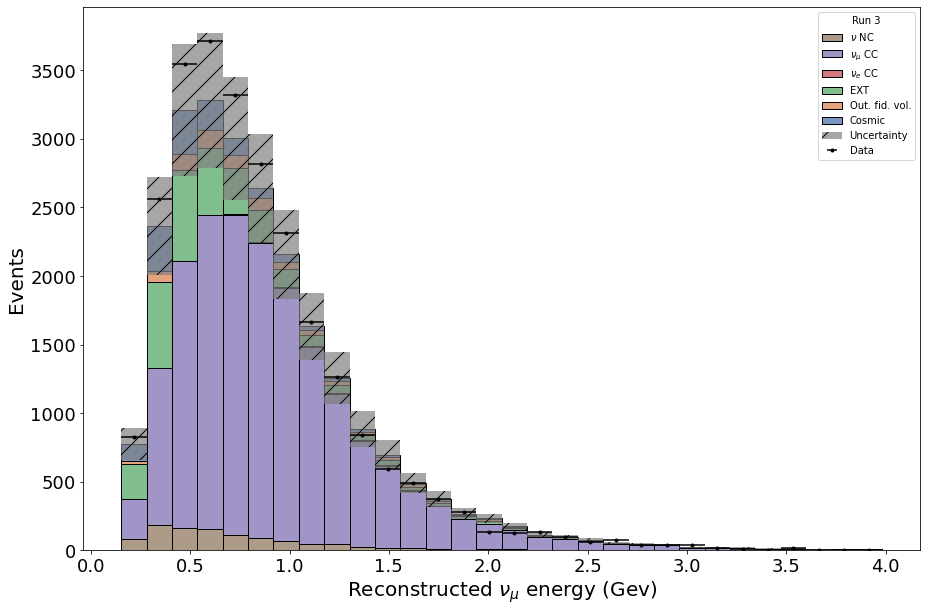

In [9]:
Neutrino_functions.histogram_plot(MC_EXT, 'trk_energy_tot', 30, 'saved_figure_name', MC_EXT['weight'],xlims=[np.min(MC_EXT['trk_energy_tot']), np.max(MC_EXT['trk_energy_tot'])], plot_data = True, logscale = False, dataFrame = data_frame)


In [10]:
#print(MC_EXT)
print(MC_EXT['category'].unique())
print(MC_EXT['category'].value_counts())

[21  4 31  5 10  7]
21    97759
7     12035
4      7829
31     6602
5      4145
10      365
Name: category, dtype: int64


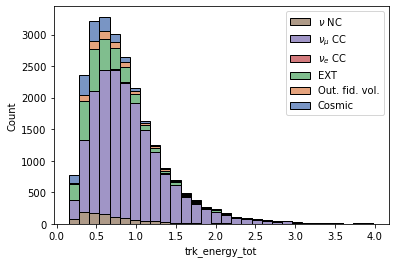

In [11]:
# the main bit to plot the raw histogram
sns.histplot(data=MC_EXT, x = 'trk_energy_tot', weights = MC_EXT['weight'], hue = "category", multiple = 'stack', palette = 'deep', bins=30, binrange=[np.min(MC_EXT['trk_energy_tot']), np.max(MC_EXT['trk_energy_tot'])], legend = False)
plt.legend(labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic",  r"Uncertainty"])

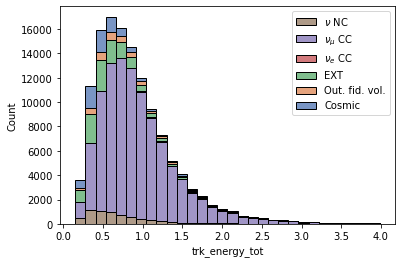

In [12]:
sns.histplot(data=MC_EXT, x = 'trk_energy_tot', hue = "category", multiple = 'stack', palette = 'deep', bins=30, binrange=[np.min(MC_EXT['trk_energy_tot']), np.max(MC_EXT['trk_energy_tot'])], legend = False)
plt.legend(labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic",  r"Uncertainty"])

# Oscillation and fitting

### Define functions and minimise chi square 
Write oscillation function and chi square. Apply oscillation function on MC data set and minimize chi square

In [20]:
def oscil_func(theta, del_m21, E):
    """
    Variables needed to get probability out:
        mixing angle (theta) idk where to get this from (data im assuming?)
        mass splitting (del_m21) idk where to get this from 
        Length travelled (L) ~ 470m
        Energy (E) taken from reconstructed v_mu energy
    """
    
    # this doesnt work yet
    L = 47
    mixing = (sin(2*theta)**2)
    # numpy to allow for many outputs
    mass_split = np.sin(((del_m21**2)*L)/4*E)**2    
    
    prob = mixing * mass_split
    return prob

*You want to look at section 4.5 for all of this. Also you're wanting to be careful with the binning here! Not discussed at all in lab book*

In [ ]:
# dumb the dataframe down to only trk_energy_tot, weight, and category
copydf = MC_EXT.copy(deep=False)
# get rid of all the rubbish columns that you dont need
new_copydf = copydf[['category', 'trk_energy_tot', 'weight']]

In [44]:
# Take bin edges of histogram given by user (we go with 30)
bins = 30

# data has already been cleaned (in selections) so this will work
bin_edge_range = np.linspace(np.min(new_copydf['trk_energy_tot']), np.max(new_copydf['trk_energy_tot']),bins,endpoint = True)

# take bin centres
bin_centers = (bin_edge_range[:-1] + bin_edge_range[1:]) / 2


# ITS LEFT SIDE BINNING BY THE LOOKS OF IT

#print(bin_edge_range)
print(bin_edge_range)
print(bin_centers)

[0.15308346 0.28514259 0.41720172 0.54926085 0.68131999 0.81337912
 0.94543825 1.07749738 1.20955651 1.34161564 1.47367478 1.60573391
 1.73779304 1.86985217 2.0019113  2.13397043 2.26602957 2.3980887
 2.53014783 2.66220696 2.79426609 2.92632522 3.05838436 3.19044349
 3.32250262 3.45456175 3.58662088 3.71868001 3.85073915 3.98279828]
[0.21911302 0.35117216 0.48323129 0.61529042 0.74734955 0.87940868
 1.01146781 1.14352695 1.27558608 1.40764521 1.53970434 1.67176347
 1.80382261 1.93588174 2.06794087 2.2        2.33205913 2.46411826
 2.5961774  2.72823653 2.86029566 2.99235479 3.12441392 3.25647305
 3.38853219 3.52059132 3.65265045 3.78470958 3.91676871]


In [30]:
# generate values for muon neutrino probability for each bin centre

# currently using model theta from paper
theta = pi*(3/8)
del_m21 = 10 #eV^2

# collect 1-P values for each bin energy with given theta and del_m21
p_vals = (1-oscil_func(theta, del_m21, bin_centers))

In [71]:
# apply these 1-P values to the weights of muon neutrinos (category 21)
# within the dataframe that you'll make now

# create new column
new_copydf['oscillation weight'] = 1

# reset the indexes for sanity
new_copydf.reset_index()
print(new_copydf)
#print(len(new_copydf))
#print(new_copydf['category'][0])

        category  trk_energy_tot    weight  oscillation weight
0             21        1.164239  0.000002                   1
1             21        1.164239  0.000002                   1
18            21        0.868494  0.186696                   1
20            21        0.763132  0.179834                   1
21            21        0.763132  0.179834                   1
...          ...             ...       ...                 ...
555596         7        0.502524  0.257732                   1
555605         7        0.348882  0.257732                   1
555606         7        0.578289  0.257732                   1
555607         7        0.578289  0.257732                   1
555615         7        0.444761  0.257732                   1

[128735 rows x 4 columns]


/tmp/ipykernel_275400/1371222319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_copydf['oscillation weight'] = 1


In [69]:
# collect which bin each one should be in
bin_no = np.digitize(new_copydf['trk_energy_tot'], bin_edge_range)
print(bin_no)
print(bin_edge_range)

print(new_copydf['trk_energy_tot'][20])

#print(bin_edge_range[bin_no[20]+1], bin_edge_range[bin_no[20]])
#print(bin_centers[bin_no[20]])
# so this works all checks out, take the bin_no of p_vals and you should be golden

for i in range(len(new_copydf)):
    if new_copydf['category'][i] == 21:
        # take bin_no[i] and use that on the p_vals for each row
        new_copydf.at[i,'oscillation weight'] = p_vals[bin_no[i]]
        
print(new_copydf)        

[8 8 6 ... 4 4 3]
[0.15308346 0.28514259 0.41720172 0.54926085 0.68131999 0.81337912
 0.94543825 1.07749738 1.20955651 1.34161564 1.47367478 1.60573391
 1.73779304 1.86985217 2.0019113  2.13397043 2.26602957 2.3980887
 2.53014783 2.66220696 2.79426609 2.92632522 3.05838436 3.19044349
 3.32250262 3.45456175 3.58662088 3.71868001 3.85073915 3.98279828]
0.7631322145462036


KeyError: 2

### Plot contour
Represent your result on matplotlib's contour

0.1530834585428238


# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

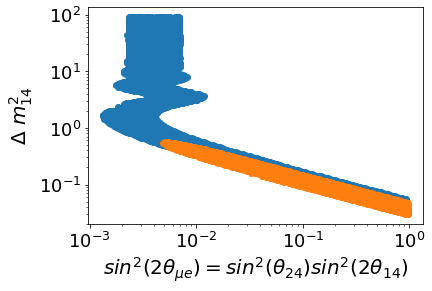

In [12]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()

### GRAVEYARD

USEFUL STUFF IN HERE!

In [ ]:
def apply_oscillations(MC_data):
    # apply the oscillation calculations to the data
    
    
    # collect the v_u CC data as histograms wrt energy
    # then apply oscillation function to raise or lower their values
    # then reinsert this into MC_DATA histogram?

Testing part 11 -> 12 disappearance nonsense

In [66]:
# dup the dataframe
copydf = MC_EXT.copy(deep=False)
# get rid of all the rubbish columns that you dont need
new_copydf = copydf[['category', 'trk_energy_tot', 'weight']]

# cut the mu data out of the frame

print(new_copydf)

        category  trk_energy_tot    weight
0             21        1.164239  0.000002
1             21        1.164239  0.000002
18            21        0.868494  0.186696
20            21        0.763132  0.179834
21            21        0.763132  0.179834
...          ...             ...       ...
555596         7        0.502524  0.257732
555605         7        0.348882  0.257732
555606         7        0.578289  0.257732
555607         7        0.578289  0.257732
555615         7        0.444761  0.257732

[128735 rows x 3 columns]


In [68]:
# select the muon neutrinos
muon_df = new_copydf[new_copydf['category'] == 21]
print(muon_df)

# then remove them from the copy
muless_copydf = new_copydf[new_copydf['category'] != 21]
print(muless_copydf)

        category  trk_energy_tot    weight
0             21        1.164239  0.000002
1             21        1.164239  0.000002
18            21        0.868494  0.186696
20            21        0.763132  0.179834
21            21        0.763132  0.179834
...          ...             ...       ...
420128        21        0.905833  0.158957
420153        21        0.314991  0.158957
420164        21        0.913495  0.158957
420165        21        0.913495  0.158957
420166        21        0.913495  0.158957

[97759 rows x 3 columns]
        category  trk_energy_tot    weight
36             4        2.545609  0.158957
37             4        2.545609  0.158957
38             4        2.545609  0.158957
43            31        0.607876  0.158957
44            31        0.607876  0.158957
...          ...             ...       ...
555596         7        0.502524  0.257732
555605         7        0.348882  0.257732
555606         7        0.578289  0.257732
555607         7        0.57

checks out, as adding the two together gives the full initial database

now to make the histogram out of the muon data

30
31


<BarContainer object of 30 artists>

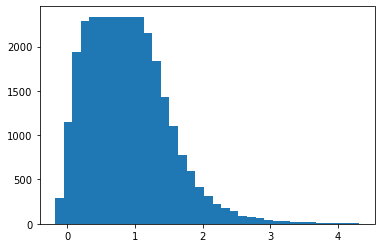

In [92]:
# you want to apply the weights either now or when you create the full plot, as its all multiplicative. just dont do it twice!
mu_hist, mu_bin_edges = np.histogram(muon_df['trk_energy_tot'], weights = muon_df['weight'], bins = 30, range=[np.min(MC_EXT['trk_energy_tot']), np.max(MC_EXT['trk_energy_tot'])])
print(len(mu_hist))
print(len(mu_bin_edges))
# take bin centres
mu_bin_centers = (mu_bin_edges[:-1] + mu_bin_edges[1:]) / 2

plt.bar(mu_bin_centers, mu_hist)

So now you have the mu data, with the energy being the bin centres, and the hist being the events distribution number. Need to oscillate this data, plug in to the MC data and then take the chi squared for each.

David was saying instead just take the sum of the weights in each bin and apply oscillation probability for each energy

[ 295.78776023 1143.12335726 1941.77711794 2290.8126812  2336.83804118
 2149.89188107 1842.56561389 1436.45903107 1099.50777998  774.9331437
  598.46235234  417.17253226  309.88138458  224.54620279  183.00431645
  139.03767386   92.96231677   79.86053162   63.14831951   45.94873941
   31.53866708   37.17269298   17.47569813   19.35452406   16.63734062
   10.32364416   12.29702981    4.92768755    5.61500623    6.51449916]


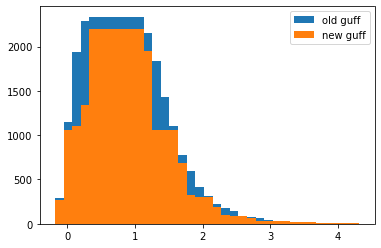

In [101]:
# now multiple each bins content with (1-Prob of oscillation wrt E, m21, etc)#

# use model theta from paper
theta = pi*(3/8)
del_m21 = 10 #eV^2

# make new mu_histograms wrt 1-P of oscillation with values of theta and del_m21
new_mu_hist = mu_hist * (1-oscil_func(theta, del_m21, mu_bin_centers))
295.78776023 1143.12335726 1941.77711794 2290.8126812  2336.83804118
 2149.89188107 1842.56561389 1436.45903107 1099.50777998  774.9331437
  598.46235234  417.17253226  309.88138458  224.54620279  183.00431645
  139.03767386   92.96231677   79.86053162   63.14831951   45.94873941
   31.53866708   37.17269298   17.47569813   19.35452406   16.63734062
   10.32364416   12.29702981    4.92768755    5.61500623    6.51449916

#print(mu_hist)
#print("")
#print(new_mu_hist)

plt.bar(mu_bin_centers, mu_hist)
plt.bar(mu_bin_centers, new_mu_hist)
plt.legend(['old guff', 'new guff'])
plt.show()

In [100]:
# Then plug new_mu_hist histogram back into dataframe
# difficult now as you want to avoid touching the weights of the new stuff, so I guess just set to 1, as they're already weighted

# create histogram from new data
print(new_mu_hist)
print(mu_bin_centers)

# generate new pandas df
mu_osc_df = pd.DataFrame(columns = ['category', 'trk_energy_tot', 'weight'])

for i in range(len(new_mu_list):
               

[ 273.07926988 1057.81991859 1101.05255325 1339.63083331 2201.63270781
 1944.6747777  1012.0763759   871.35858073 1054.08484861  683.34289377
  319.57417395  262.8967377   301.40973977  192.5365803    95.41319716
   91.10433883   91.46475412   66.42492952   32.30470688   31.31312435
   31.29381689   29.92654502    8.82007771   13.71373235   16.59735033
    8.0286514     6.15915908    3.6274684     5.61446783    4.88575435]
[0.21691204 0.3445692  0.47222636 0.59988352 0.72754068 0.85519784
 0.982855   1.11051216 1.23816932 1.36582648 1.49348365 1.62114081
 1.74879797 1.87645513 2.00411229 2.13176945 2.25942661 2.38708377
 2.51474093 2.64239809 2.77005525 2.89771241 3.02536957 3.15302673
 3.28068389 3.40834106 3.53599822 3.66365538 3.79131254 3.9189697 ]


In [11]:
def chi_squared_pearson(data, MC_data):
    # scrape through bins for number of events in both data bins and Overlay + EXT bins (MC_EXT and data)
    # data is real data, prediction is MC_data
    # BUT ONLY COLLECT MUON NEUTRINO/SIGNAL DATA - CATEGORY = 21
    
    # take category = 21 data
    
    data = (MC_data - data)
    np.sum()
    return chi_squared